### Assignment 8

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
external_file_folder = "/Users/giuliamoret/Documents/Documenti università/EETBS/Data-driven_Building_simulation_Polimi_EETBS/Data"
consumption_file = "consumption_5545.csv"
temperature_file = "Austin_weather_2014.csv"
irradiance_file = "irradiance_2014_gen.csv"
path_consumption = os.path.join(external_file_folder,consumption_file)
path_temperature = os.path.join(external_file_folder,temperature_file)
path_irradiance = os.path.join(external_file_folder,irradiance_file)

#### Import and format consumption dataset

In [3]:
DF_consumption = pd.read_csv(path_consumption, sep=",",index_col=0)
old_index_consumption = DF_consumption.index
new_parsed_index = pd.to_datetime(old_index_consumption)
DF_consumption.index = new_parsed_index
DF_consumption.head()

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0
2014-01-01 09:00:00,0.0
2014-01-01 10:00:00,0.0


##### Now we are able to extract:

In [4]:
DF_consumption.index.hour # DF starts at 6 am

Int64Index([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
            ...
            20, 21, 22, 23,  0,  1,  2,  3,  4,  5],
           dtype='int64', length=8736)

In [5]:
DF_consumption.index.month # DF starts in January

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=8736)

In [6]:
DF_consumption.index.dayofweek # DF starts on Wednesday

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
           dtype='int64', length=8736)

In [7]:
DF_consumption_first_two_weeks_of_july = DF_consumption.loc["2014-07-01 00:00:00":"2014-07-15 00:00:00",:]
DF_consumption_first_two_weeks_of_july # we can also visualize only a part of the DF

,air conditioner_5545
2014-07-01 00:00:00,720.750000
2014-07-01 01:00:00,533.666667
2014-07-01 02:00:00,492.800000
2014-07-01 03:00:00,220.266667
2014-07-01 04:00:00,138.483333
2014-07-01 05:00:00,0.000000
2014-07-01 06:00:00,0.000000
2014-07-01 07:00:00,0.000000
2014-07-01 08:00:00,0.000000
2014-07-01 09:00:00,0.000000


#### Plot the consumption of this time interval using Pandas

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


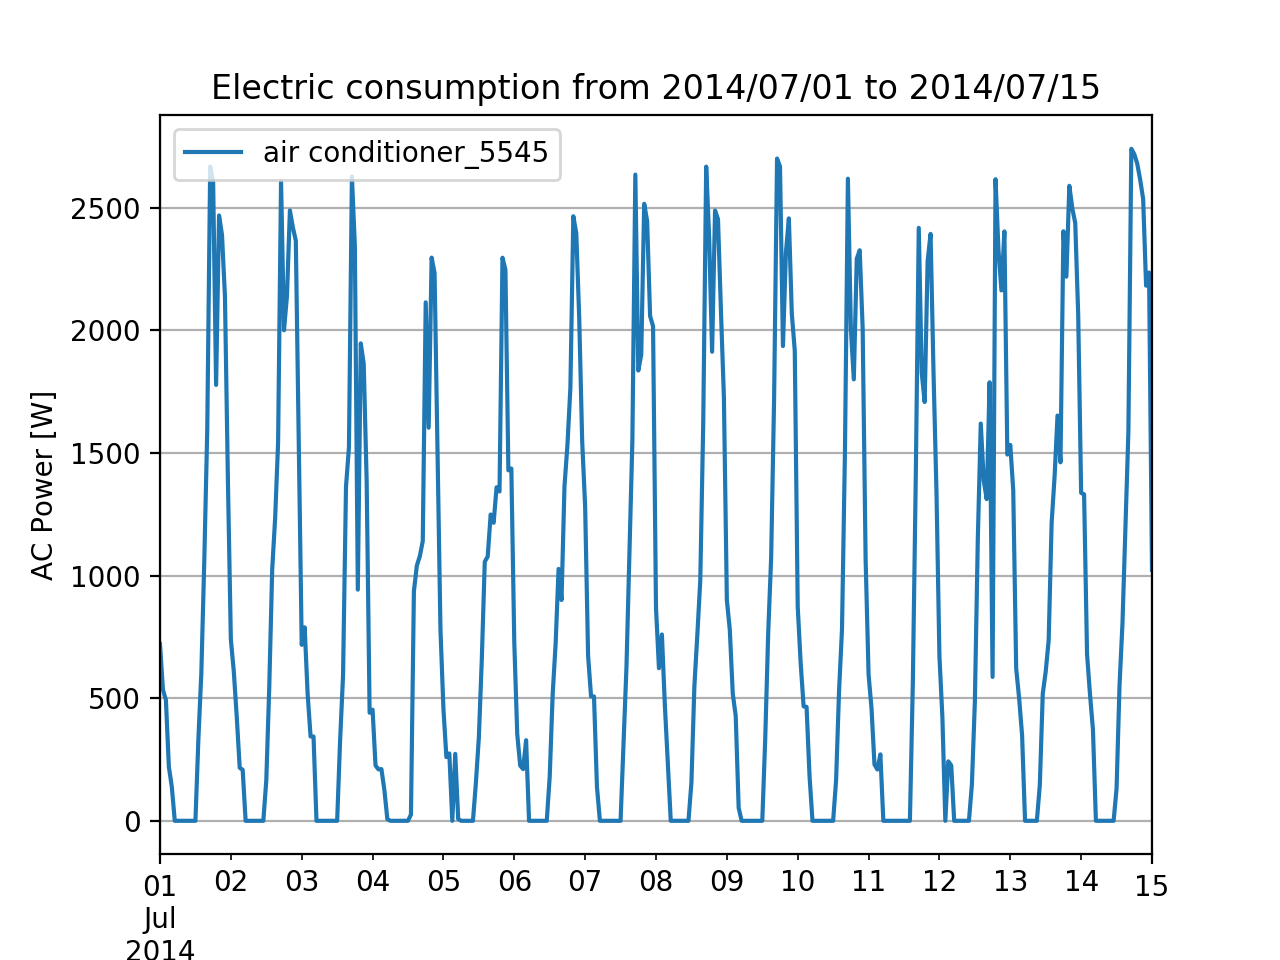

In [9]:
DF_consumption_first_two_weeks_of_july.plot()
plt.xlabel("Time")
plt.ylabel("AC Power [W]")
plt.grid()
plt.legend(loc="upper left")
plt.title("Electric consumption from 2014/07/01 to 2014/07/15")

#### To better understand, I extract only the first day of July

<IPython.core.display.Javascript object>


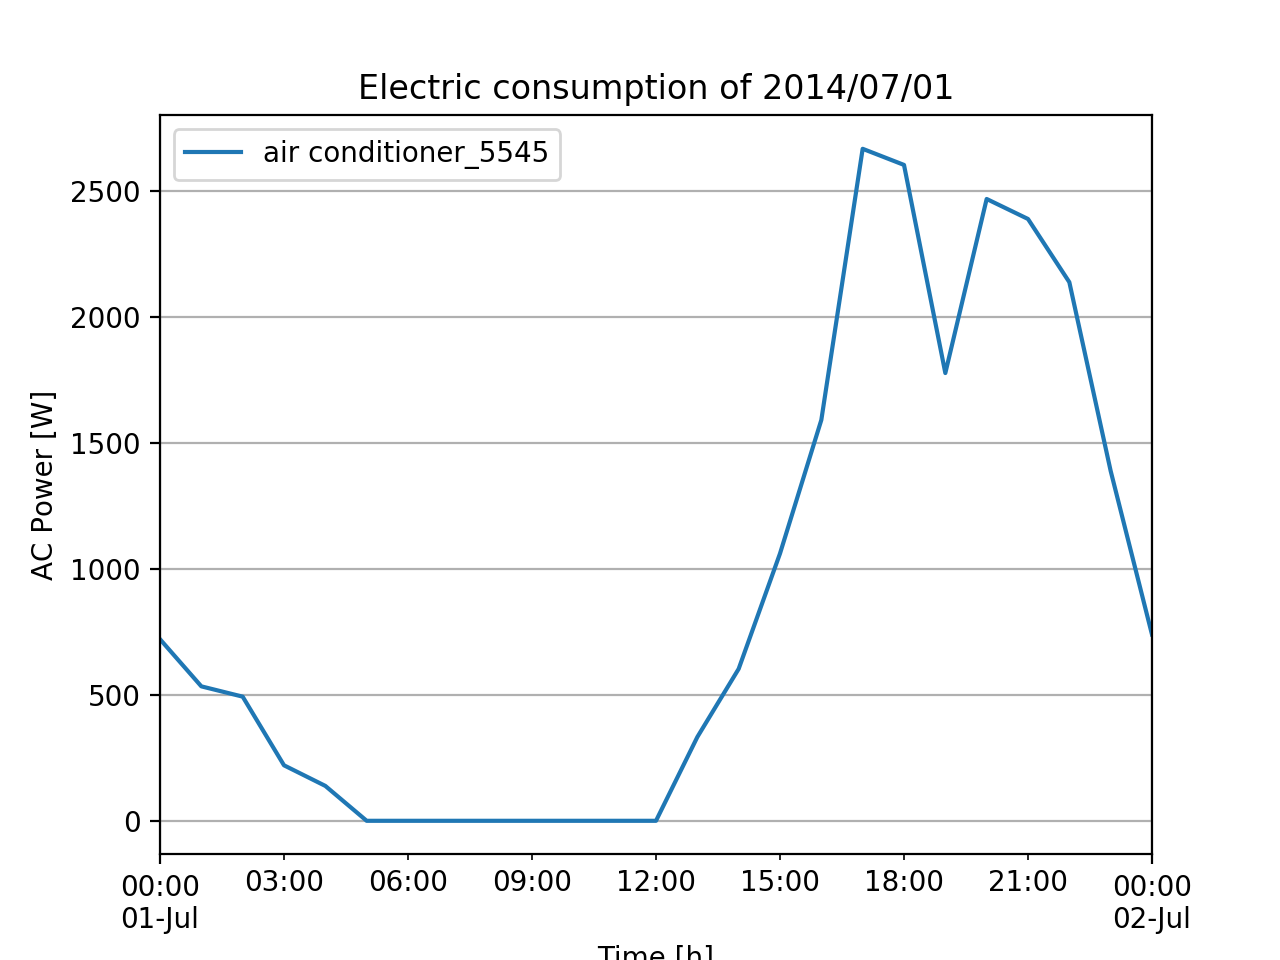

In [10]:
DF_consumption_first_day_of_july = DF_consumption.loc["2014-07-01 00:00:00":"2014-07-02 00:00:00",:]
DF_consumption_first_day_of_july.plot()
plt.xlabel("Time [h]")
plt.ylabel("AC Power [W]")
plt.grid()
plt.legend(loc="upper left")
plt.title("Electric consumption of 2014/07/01")

#### Import and format weather dataset

In [11]:
DF_weather = pd.read_csv(path_temperature, sep=";",index_col=0)
old_index_weather = DF_weather.index
new_parsed_index_weather = pd.to_datetime(old_index_weather)
DF_weather.index = new_parsed_index_weather

##### Since this dataset is big and we are interested only in temperature, we create a "sub-dataset"

In [12]:
DF_temperature = DF_weather.loc[:,["temperature"]]
DF_temperature.head()

,temperature
localhour,
2014-01-01 06:00:00,40.36
2014-01-01 07:00:00,38.11
2014-01-01 08:00:00,38.65
2014-01-01 09:00:00,38.47
2014-01-01 10:00:00,38.00


##### Weather station provide us with the data in which the timestamp is in standard time zone (London), so we need to shift up the column

In [13]:
DF_temperature.loc[:,"temperature"]=DF_temperature.loc[:,"temperature"].shift(-5)
DF_temperature.head()

,temperature
localhour,
2014-01-01 06:00:00,38.85
2014-01-01 07:00:00,39.36
2014-01-01 08:00:00,37.86
2014-01-01 09:00:00,38.97
2014-01-01 10:00:00,45.85


In [14]:
DF_temperature_first_two_weeks_of_july = DF_temperature.loc["2014-07-01 00:00:00":"2014-07-15 00:00:00",:]
DF_temperature_first_two_weeks_of_july.head()

,temperature
localhour,
2014-07-01 00:00:00,78.34
2014-07-01 01:00:00,76.71
2014-07-01 02:00:00,75.90
2014-07-01 03:00:00,75.91
2014-07-01 04:00:00,75.83


#### Import and format irradiance dataset

In [15]:
DF_irradiance_source = pd.read_csv(path_irradiance, sep=";",index_col=1)
DF_irradiance = DF_irradiance_source.loc[:,["gen"]] # as before we create a "sub-dataset"
old_index_irradiance = DF_irradiance.index
new_index_irradiance = pd.to_datetime(old_index_irradiance)
DF_irradiance.index = new_index_irradiance
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350
2014-01-01 03:00:00,-0.006267
2014-01-01 04:00:00,-0.006767


##### Those generated power value that are negative need to be converted into 0

In [16]:
DF_irradiance.loc[DF_irradiance.loc[:,"gen"]<0,:]=0
DF_irradiance.head()

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0
2014-01-01 03:00:00,0.0
2014-01-01 04:00:00,0.0


In [17]:
DF_irradiance_first_two_weeks_of_july = DF_irradiance.loc["2014-07-01 00:00:00":"2014-07-15 00:00:00",:]
DF_irradiance_first_two_weeks_of_july.head()

,gen
localhour,
2014-07-01 00:00:00,0.0
2014-07-01 01:00:00,0.0
2014-07-01 02:00:00,0.0
2014-07-01 03:00:00,0.0
2014-07-01 04:00:00,0.0


#### Now I can put everything together using ".join"

In [18]:
DF_joined = DF_consumption.join([DF_temperature,DF_irradiance])
DF_joined_selected = DF_joined.loc["2014-07-01 00:00:00":"2014-07-15 00:00:00",:]
DF_joined_selected.head()

,air conditioner_5545,temperature,gen
2014-07-01 00:00:00,720.750000,78.34,0.0
2014-07-01 01:00:00,533.666667,76.71,0.0
2014-07-01 02:00:00,492.800000,75.90,0.0
2014-07-01 03:00:00,220.266667,75.91,0.0
2014-07-01 04:00:00,138.483333,75.83,0.0


#### Now I can plot everything together. I can use two methods:
#### 1) subplot

<IPython.core.display.Javascript object>


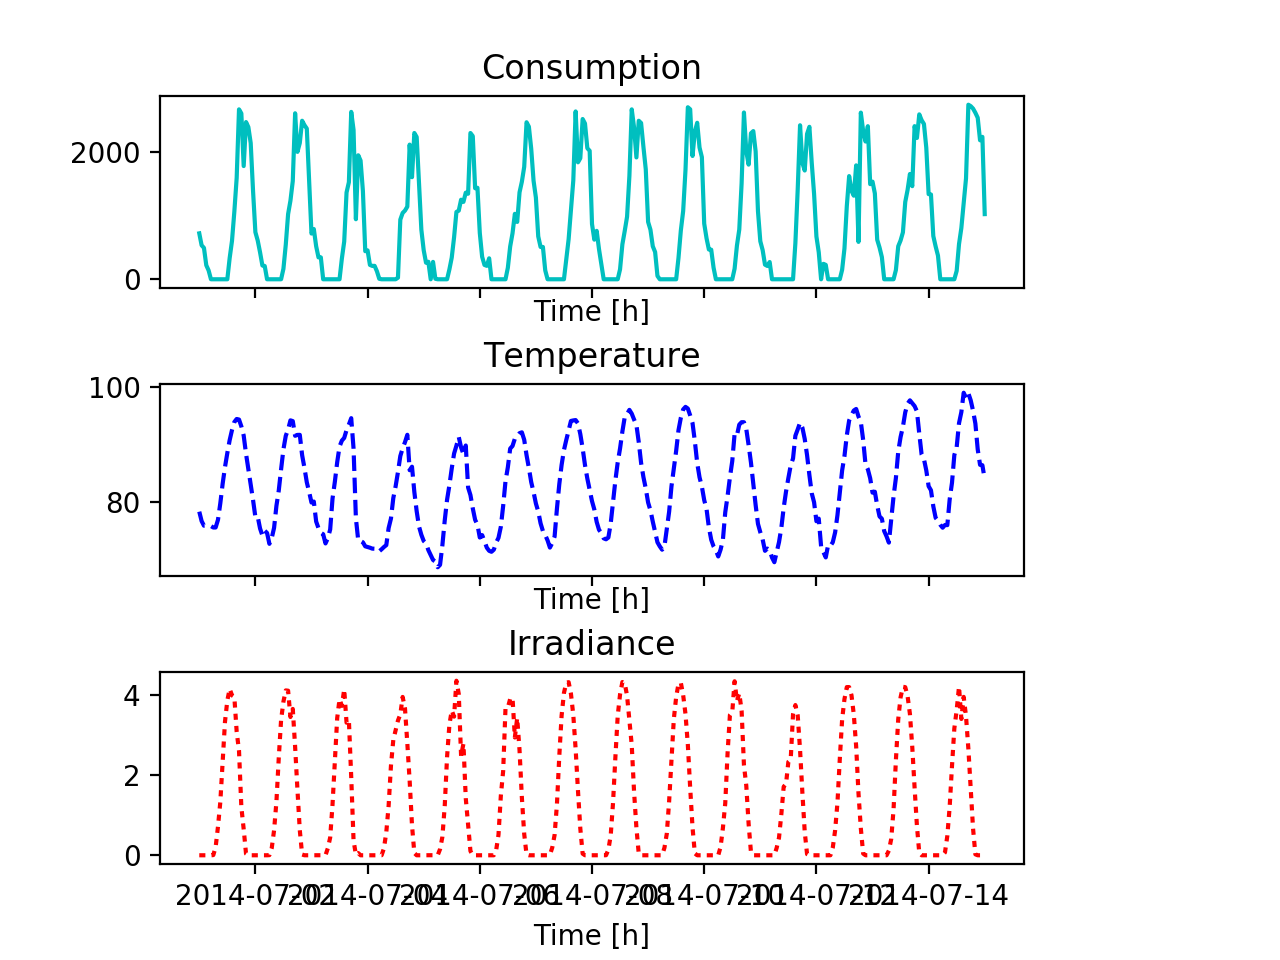

In [19]:
fig, ax = plt.subplots(3)
ax[0].plot(DF_consumption_first_two_weeks_of_july,"c-")
ax[1].plot(DF_temperature_first_two_weeks_of_july,"b--")
ax[2].plot(DF_irradiance_first_two_weeks_of_july,"r:")
ax[0].set_title("Consumption")
ax[1].set_title("Temperature")
ax[2].set_title("Irradiance")

for ax in ax.flat:
    ax.set(xlabel='Time [h]')

#ax[0].set_label(ylabel="AC Power [W]")

for ax in fig.get_axes():
    ax.label_outer()
    
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace = 0.5)

<IPython.core.display.Javascript object>


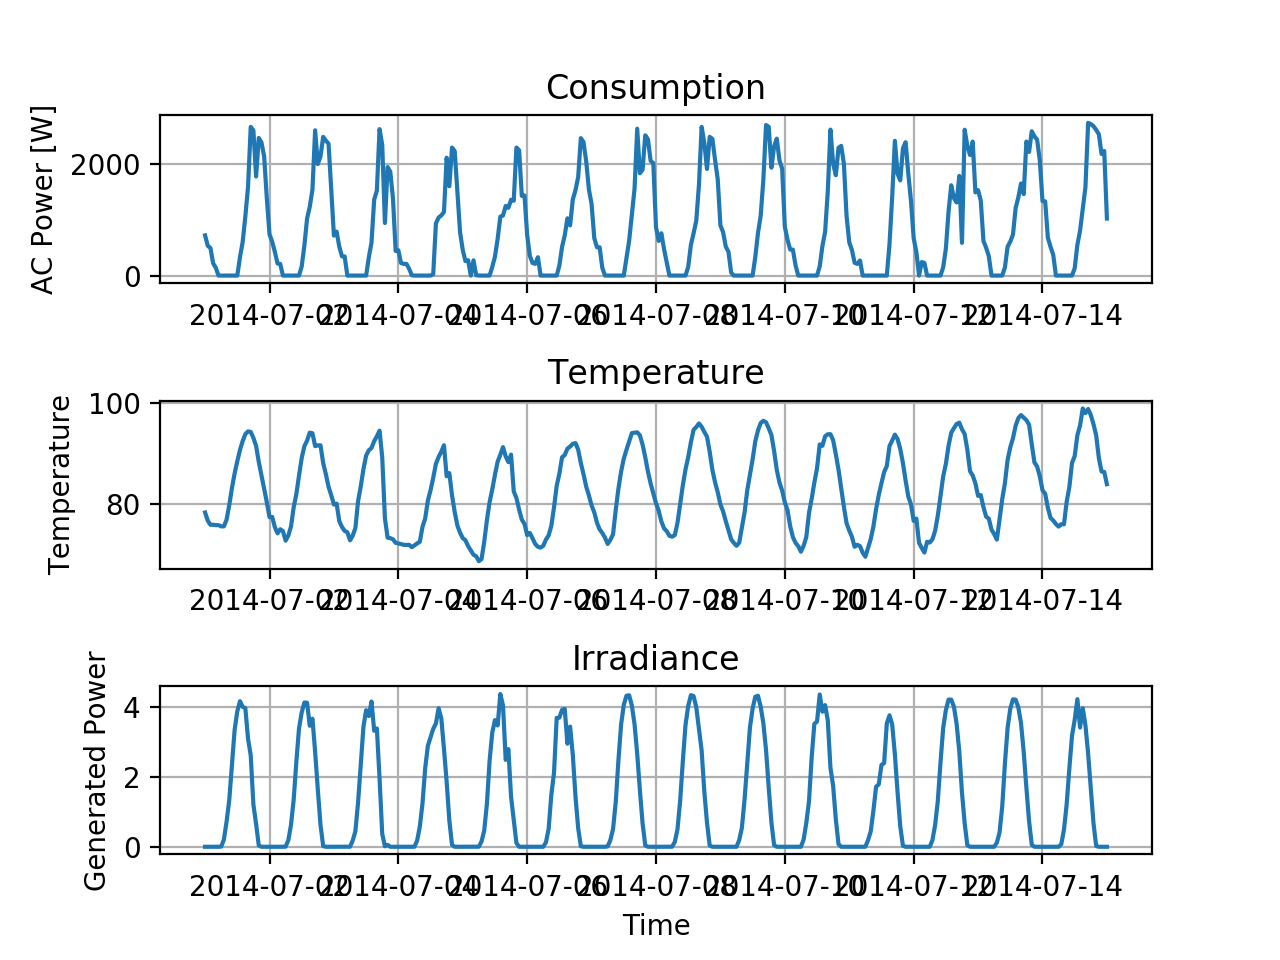

In [20]:
plt.figure()

ax = plt.subplot(311)
#ax.set_aspect(1)
plt.plot(DF_consumption_first_two_weeks_of_july)
#plt.xlabel('this is a xlabel\n(with newlines!)')
plt.ylabel('AC Power [W]', multialignment='center')
plt.grid(True)
plt.title("Consumption")

plt.subplot(312)
plt.plot(DF_temperature_first_two_weeks_of_july)
#plt.xlabel('this is a xlabel\n(with newlines!)')
plt.ylabel('Temperature')
plt.grid(True)
plt.title("Temperature")

plt.subplot(313)
plt.plot(DF_irradiance_first_two_weeks_of_july)
plt.xlabel('Time')
plt.ylabel('Generated Power',multialignment='center')
plt.grid(True)
plt.title("Irradiance")

plt.subplots_adjust(hspace = 0.7)
plt.show()

#### 2) Normalizing

In [21]:
# NORMALIZE CONSUMPTION
DF_consumption_min = DF_joined_selected.loc[:,"air conditioner_5545"].min()
DF_consumption_max = DF_joined_selected.loc[:,"air conditioner_5545"].max()
DF_consumption_max_min = DF_consumption_max - DF_consumption_min
DF_consumption_normalized = DF_joined_selected.loc[:,"air conditioner_5545"]/DF_consumption_max_min

In [22]:
# NORMALIZE TEMPERATURE
DF_temperature_min = DF_joined_selected.loc[:,"temperature"].min()
DF_temperature_max = DF_joined_selected.loc[:,"temperature"].max()
DF_temperature_max_min = DF_temperature_max - DF_temperature_min
DF_temperature_normalized = DF_joined_selected.loc[:,"temperature"]/DF_temperature_max_min

In [23]:
# NORMALIZE IRRADIANCE
DF_irradiance_min = DF_joined_selected.loc[:,"gen"].min()
DF_irradiance_max = DF_joined_selected.loc[:,"gen"].max()
DF_irradiance_max_min = DF_irradiance_max - DF_irradiance_min
DF_irradiance_normalized = DF_joined_selected.loc[:,"gen"]/DF_irradiance_max_min

#### Now we can plot everything together

<IPython.core.display.Javascript object>


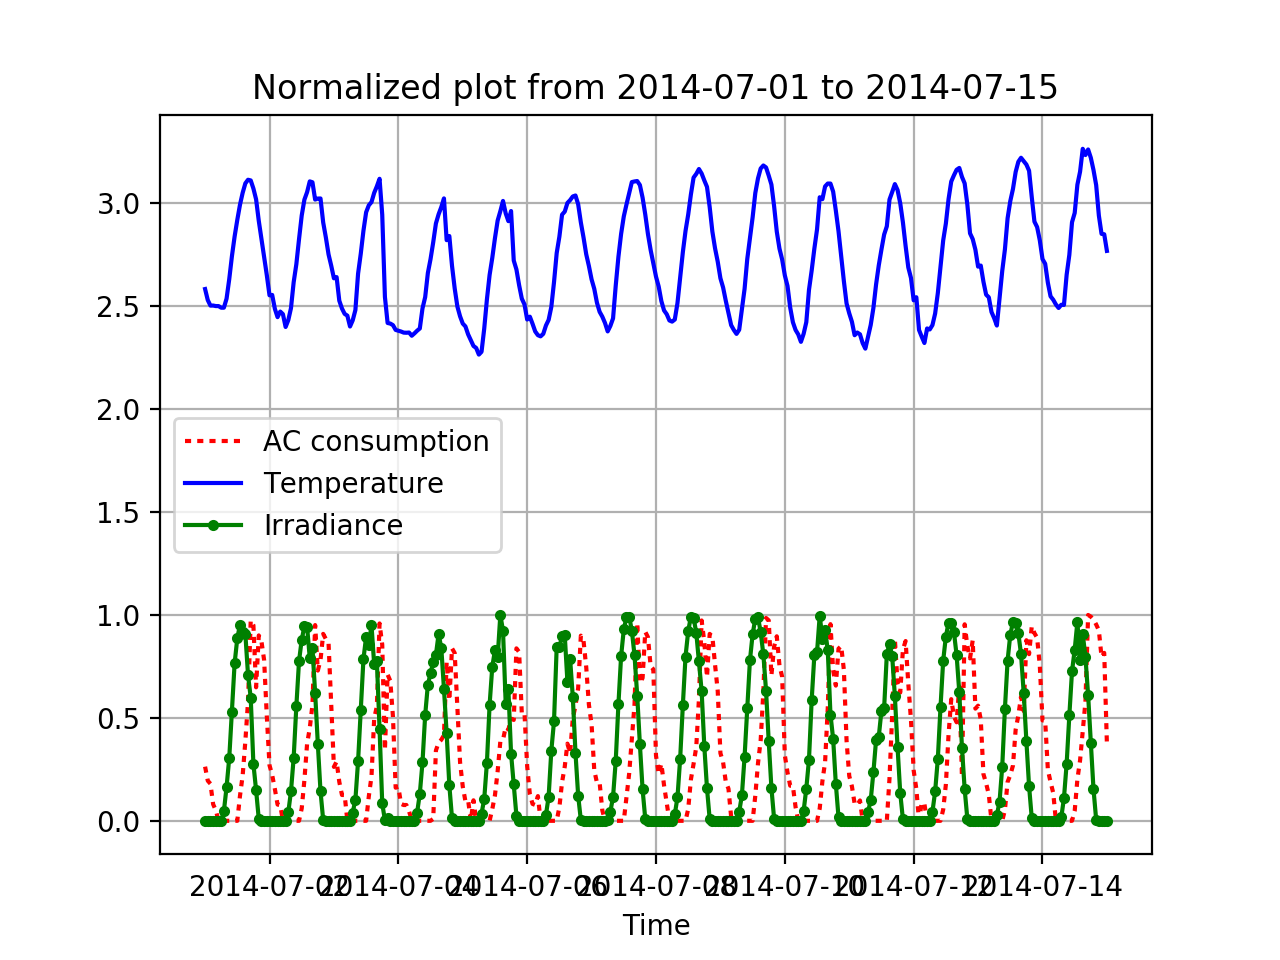

In [28]:
plt.figure()
plt.plot(DF_consumption_normalized, "r:", label="AC consumption")
plt.plot(DF_temperature_normalized, "b-", label="Temperature")
plt.plot(DF_irradiance_normalized, "g.-", label="Irradiance")
plt.xlabel("Time")
plt.grid()
plt.legend(loc="center left")
plt.title("Normalized plot from 2014-07-01 to 2014-07-15")